 # requiriments

In [1]:
# base
import sys
import os
#cleaning
import re
#manupulate numbers
import numpy as np
import pandas as pd
import random
#Graph
import seaborn  as sns
import matplotlib.pyplot as plt
from datetime import date,datetime,timedelta
#store
import pickle
#method
sys.path.append('..')
from src.settings import Settings
settings = Settings()
#modeling
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
#ensamble
from sklearn.tree import DecisionTreeClassifier

<ipython-input-1-ceae8cb5c704>:9: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


 # Data

In [2]:
df = pd.read_csv('../data/train.csv')
df

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8614,austin,Updated Great Hills Opportunity! Large corner ...,Single Family,30.409927,-97.763390,2,False,1982,3,15246.0,7.000000,17,3.0,3,650000+
9996,10505,austin,Adorable 3/2 in the heart of South Austin! Sit...,Single Family,30.206074,-97.779472,0,False,1970,0,6577.0,4.000000,14,2.0,3,250000-350000
9997,6942,austin,"7322 Gaines Mill Ln, Austin, TX 78745 is a sin...",Single Family,30.198936,-97.810913,0,False,1981,1,7623.0,4.000000,13,2.0,3,350000-450000
9998,1845,austin,"5213 Doe Valley Ln, Austin, TX 78759 is a sing...",Single Family,30.391880,-97.761292,0,False,1979,2,13939.2,7.000000,17,3.0,3,250000-350000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000

In [4]:
df_types = pd.DataFrame(df.dtypes)
object_features = df_types[df_types[0] == 'object'].index.to_list()
object_features

['city', 'description', 'homeType', 'priceRange']

In [5]:
float_features = df_types[df_types[0] == 'float64'].index.to_list()
float_features

['latitude', 'longitude', 'lotSizeSqFt', 'avgSchoolRating', 'numOfBathrooms']

In [6]:
int_features = df_types[df_types[0] == 'int64'].index.to_list()
int_features

['uid',
 'garageSpaces',
 'yearBuilt',
 'numOfPatioAndPorchFeatures',
 'MedianStudentsPerTeacher',
 'numOfBedrooms']

In [7]:
bool_features = df_types[df_types[0] == 'bool'].index.to_list()
bool_features

['hasSpa']

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,10000.0,7626.621900,4380.486852,1.000000,3838.750000,7603.500000,11435.750000,1.517000e+04
latitude,10000.0,30.291191,0.097075,30.085030,30.202516,30.283664,30.366375,3.051732e+01
longitude,10000.0,-97.778476,0.084543,-98.020477,-97.838594,-97.769680,-97.718313,-9.757063e+01
garageSpaces,10000.0,1.229600,1.328179,0.000000,0.000000,1.000000,2.000000,2.200000e+01
yearBuilt,10000.0,1988.570400,21.515272,1905.000000,1975.000000,1993.000000,2006.000000,2.020000e+03
numOfPatioAndPorchFeatures,10000.0,0.667200,0.986378,0.000000,0.000000,0.000000,1.000000,8.000000e+00
lotSizeSqFt,10000.0,20710.283980,448833.815153,100.000000,6534.000000,8189.000000,10890.000000,3.415452e+07
avgSchoolRating,10000.0,5.766236,1.861940,2.333333,4.000000,5.666667,7.000000,9.500000e+00
MedianStudentsPerTeacher,10000.0,14.857700,1.748473,10.000000,14.000000,15.000000,16.000000,1.900000e+01
numOfBathrooms,10000.0,2.692100,0.979206,1.000000,2.000000,3.000000,3.000000,1.000000e+01


In [9]:
df[object_features].describe(include='all').T

,count,unique,top,freq
city,10000,7,austin,9898
description,9999,9982,Coming soon! Photos and details will be availa...,8
homeType,10000,10,Single Family,9427
priceRange,10000,5,250000-350000,2356


In [10]:
for col in object_features:
    print(f'------>{col} : {df[col].unique()}')
    print(f'------>{col} : {df[col].value_counts(dropna=False)}')

------>city : ['austin' 'pflugerville' 'del valle' 'manchaca' 'dripping springs'
 'west lake hills' 'driftwood']
------>city : city
austin              9898
del valle             57
pflugerville          29
driftwood              8
manchaca               3
dripping springs       3
west lake hills        2
Name: count, dtype: int64
------>description : ['MULTIPLE OFFERS submit best & final to Agent by Mon 21st - 5pm. Appt with Agent.  RARE PANORAMIC VIEW LOT IN JESTER ESTATES SEE FOR MILES!!  Home sits on Cul-de-sac & backs to a Preserve.  Stunning remodeled Kitchen & Bathrooms. Master suite is a private sanctuary with chic master bath, huge bedroom, walk-in closet & private deck.  Jester has a pool, park, tennis courts & feeds into Anderson High.  This home has been well loved & features 3 living areas, an office, & 3 car garage.'
 '4644 Hoffman Dr, Austin, TX 78749 is a single family home that contains 2,059 sq ft and was built in 1997. It contains 4 bedrooms and 3 bathrooms. \r\n \r\

In [11]:
df['priceRange'].unique().tolist()

['650000+', '350000-450000', '0-250000', '450000-650000', '250000-350000']

 ## null values visualization

Text(50.722222222222214, 0.5, 'Fila')

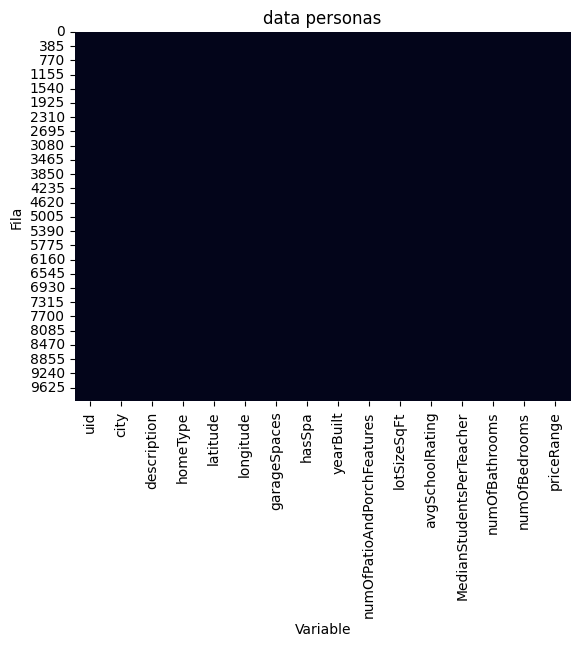

In [12]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("data personas")
plt.xlabel('Variable')
plt.ylabel('Fila')

 # numeric variables
 ## variables distribution

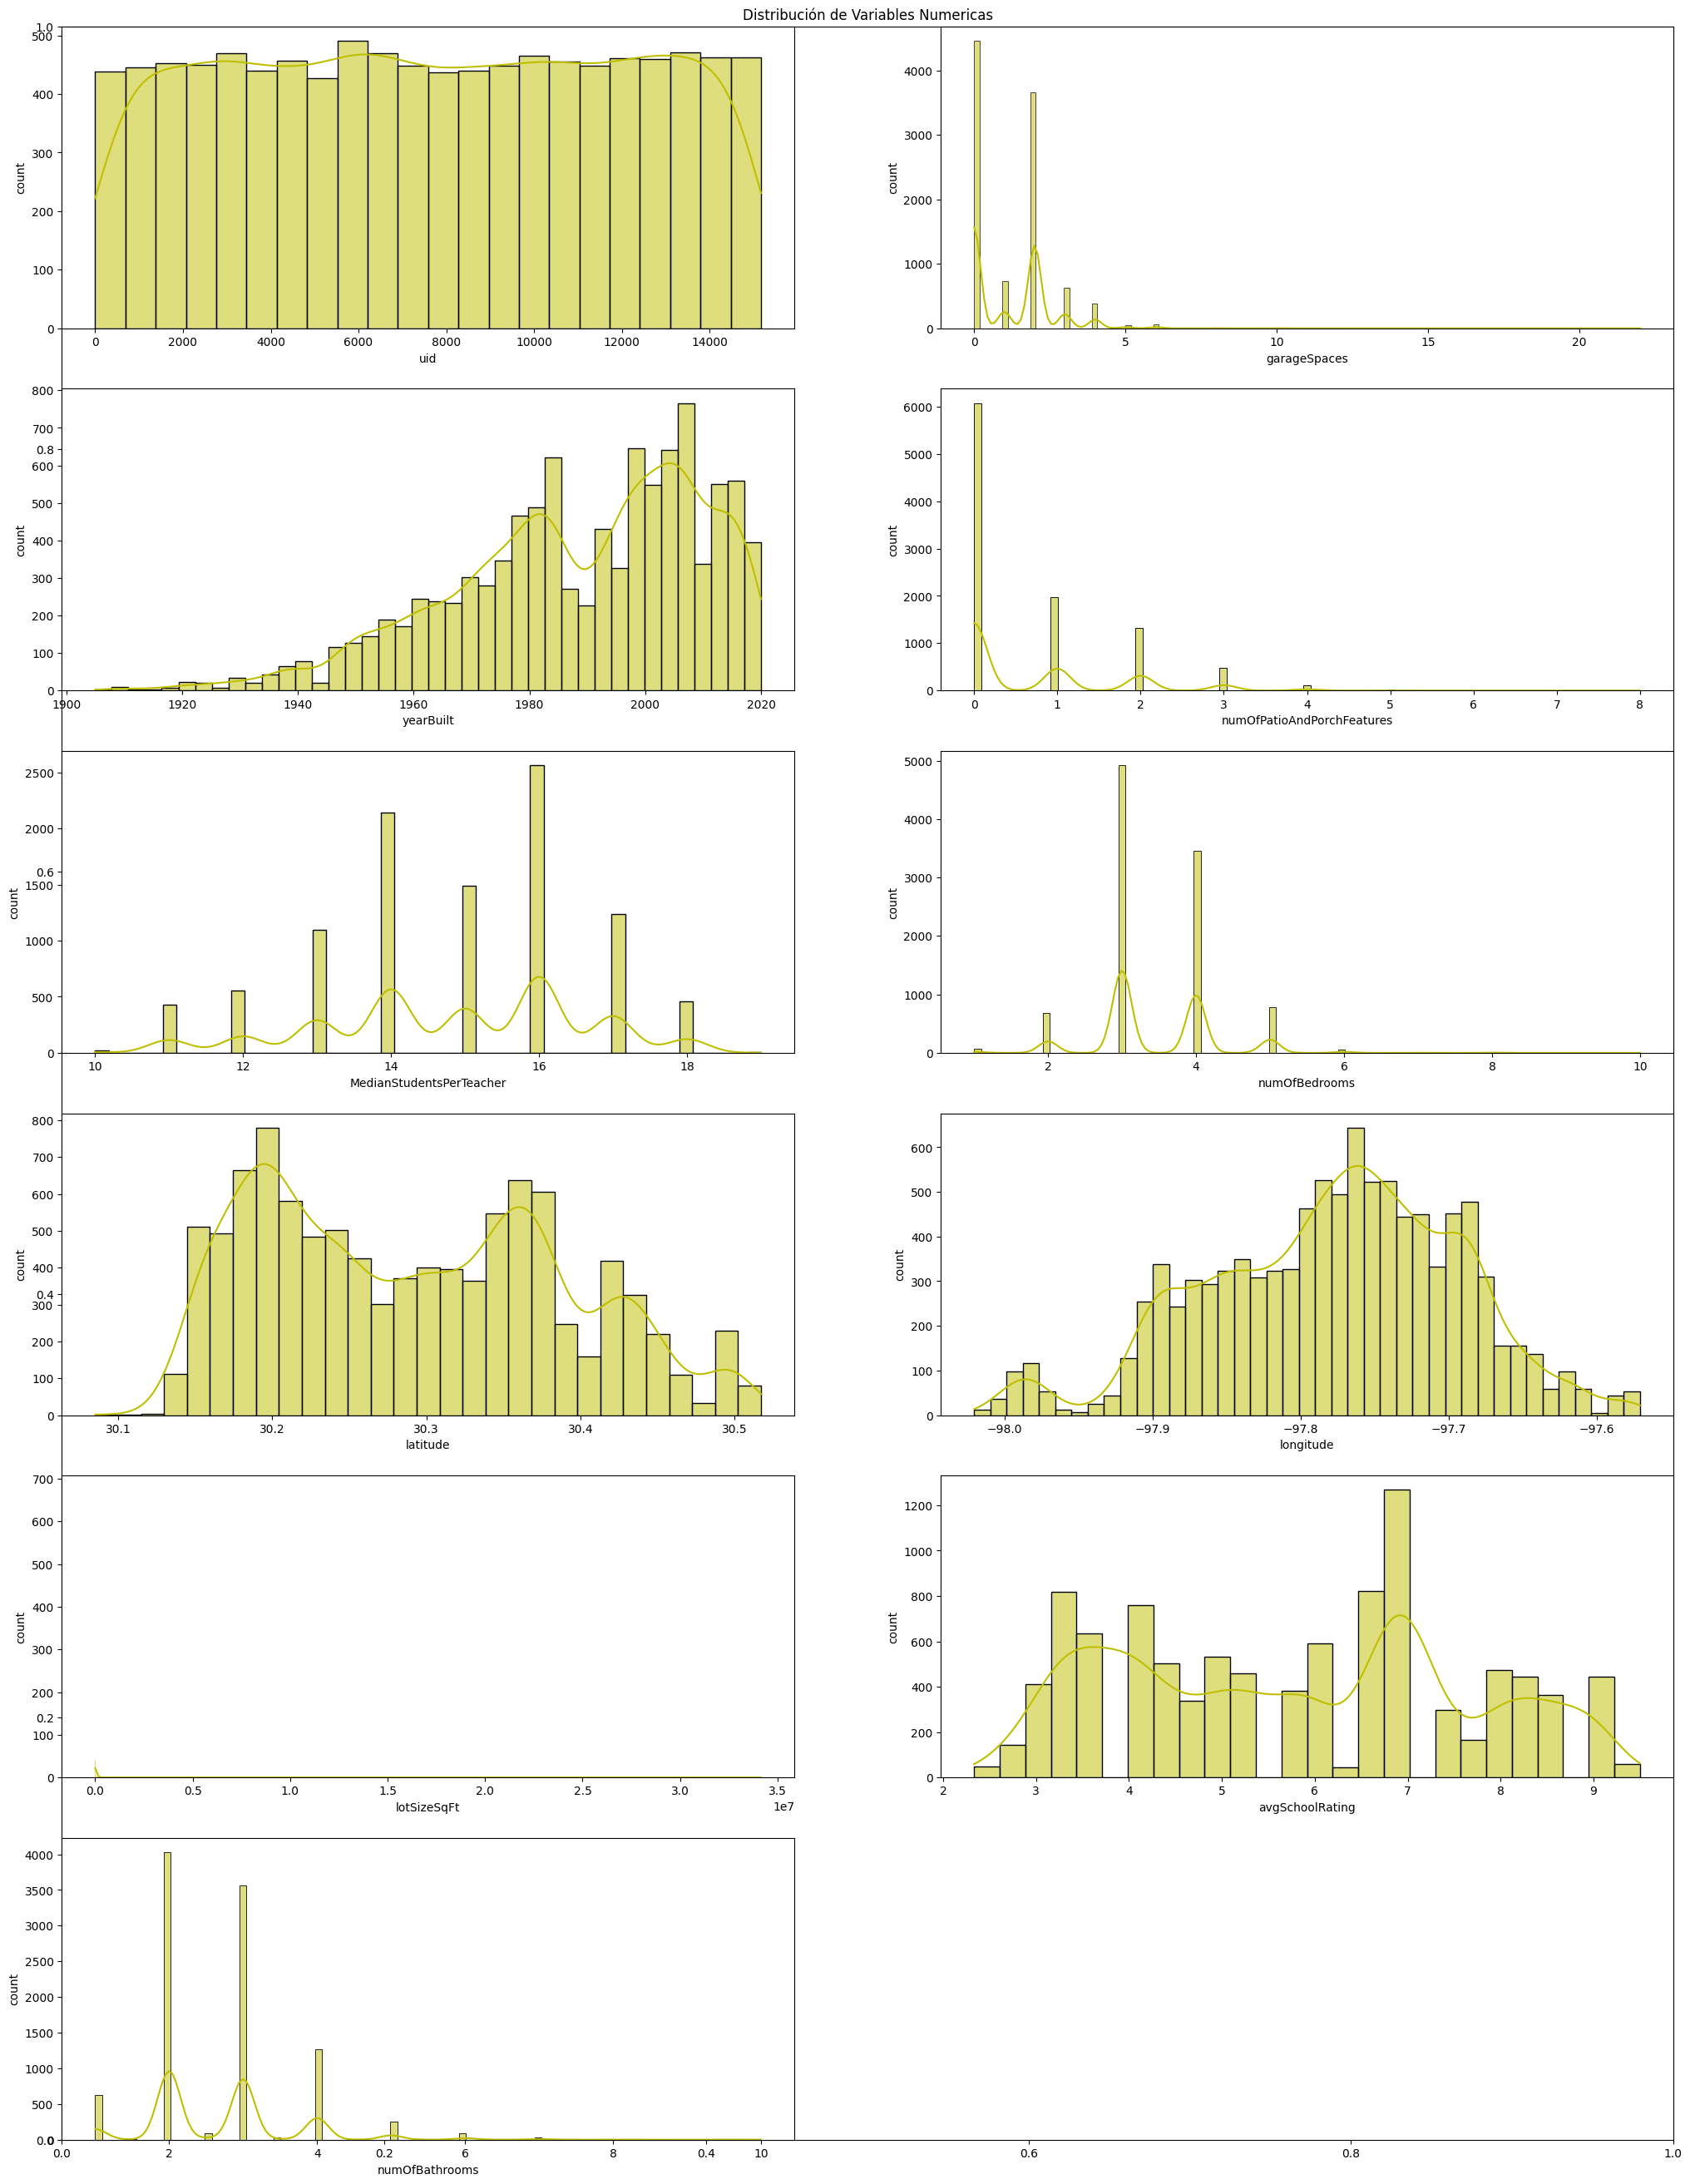

In [13]:
var_hist = int_features + float_features
plt.figure(figsize=(25,6*len(var_hist)/2))
plt.title("Distribución de Variables Numericas")
for i,var in enumerate(var_hist):
    plt.subplot(round(len(var_hist)/2),2,i+1)
    sns.histplot(df, x=var, color='y', kde=True)
    plt.xlabel(var)
    plt.ylabel("count")

<Axes: xlabel='lotSizeSqFt'>

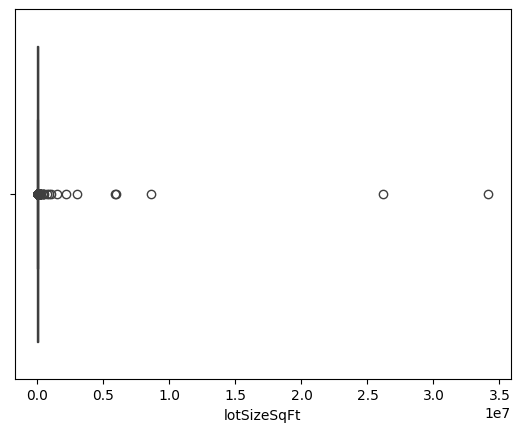

In [14]:
sns.boxplot(x=df['lotSizeSqFt'])

In [15]:
df['lotSizeSqFt'].describe([0.9,0.95,0.99])

count    1.000000e+04
mean     2.071028e+04
std      4.488338e+05
min      1.000000e+02
50%      8.189000e+03
90%      1.611720e+04
95%      2.570040e+04
99%      9.278280e+04
max      3.415452e+07
Name: lotSizeSqFt, dtype: float64

In [16]:
df['lotSizeSqFt'].value_counts(dropna=False)

lotSizeSqFt
12196.8     196
11761.2     192
11325.6     190
6969.0      162
12632.4     159
           ... 
100188.0      1
6325.0        1
6298.0        1
9156.0        1
42253.2       1
Name: count, Length: 1105, dtype: int64

In [17]:
df[df['lotSizeSqFt']>df['lotSizeSqFt'].quantile(0.999)]

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
1696,9244,austin,Leased for $1695 though 7/31/2020 - Unique gat...,Condo,30.285631,-97.745697,0,False,1982,0,34154524.8,6.000000,16,1.0,2,0-250000
2503,11116,austin,**Subject to City of Austin SMART Housing and ...,Townhouse,30.294910,-97.698997,1,False,2016,0,26179560.0,5.000000,15,2.0,2,0-250000
3232,1703,austin,This beautiful one-story home features warm ca...,Single Family,30.168011,-97.983322,2,False,2013,2,2988216.0,7.000000,16,3.0,4,350000-450000
3406,4444,austin,Rare acreage close in! 24 acres with unbelieva...,Single Family,30.225046,-97.989883,2,False,1994,0,1003622.4,6.666667,16,3.0,3,650000+
4428,1572,austin,"166 Briarpatch Ct, Austin, TX 78737 is a singl...",Single Family,30.169123,-97.989502,0,False,2010,0,871200.0,8.000000,15,3.0,4,350000-450000
7366,4600,austin,"301 Stone View Trl, Austin, TX 78737 is a sing...",Single Family,30.211395,-97.977341,0,False,2012,0,1516323.6,6.666667,16,3.0,4,350000-450000
8678,869,austin,"Rare 2 story home with 5 bed, 4.5 bath, dedica...",Single Family,30.490353,-97.789581,2,False,2015,2,5880600.0,7.666667,14,5.0,5,450000-650000
8737,10861,austin,"CYPRESS PLAN, NEW CONSTRUCTION, GREEN-RATED HO...",Single Family,30.368792,-97.651016,0,False,2009,0,2178000.0,4.333333,12,2.5,3,0-250000
9306,4635,austin,"201 Charismatic Pl, Austin, TX 78737 is a sing...",Single Family,30.205276,-98.011406,3,True,2015,0,8581320.0,6.666667,16,6.0,5,650000+
9958,8071,austin,Newly remodeled 3-2 conveniently located in Br...,Single Family,30.509415,-97.740211,2,False,1985,0,5967720.0,7.000000,16,2.0,3,0-250000


<Axes: xlabel='log_lotSizeSqFt'>

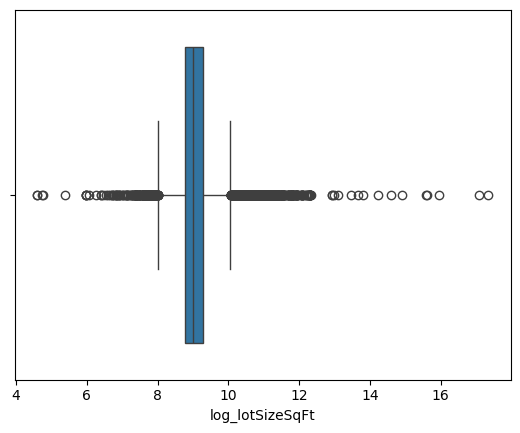

In [18]:
df['log_lotSizeSqFt'] = np.log(df['lotSizeSqFt'])
sns.boxplot(x=df['log_lotSizeSqFt'])

<Axes: xlabel='log_lotSizeSqFt', ylabel='Count'>

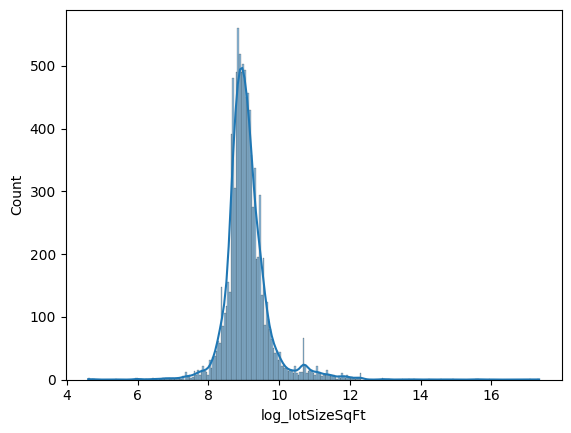

In [19]:
sns.histplot(df['log_lotSizeSqFt'], kde=True)

 ## categorical variables

In [20]:
object_features = [obj_var for obj_var in object_features if obj_var not in ['description']]
object_features

['city', 'homeType', 'priceRange']

In [21]:
city_map = {i: city for city,i in df['city'].value_counts().sort_values().reset_index().to_dict()['city'].items()}
city_map

{'west lake hills': 0,
 'manchaca': 1,
 'dripping springs': 2,
 'driftwood': 3,
 'pflugerville': 4,
 'del valle': 5,
 'austin': 6}

In [22]:
homeType_map = {i: homeType for homeType,i in df['homeType'].value_counts().sort_values().reset_index().to_dict()['homeType'].items()}
homeType_map

{'Other': 0,
 'Vacant Land': 1,
 'MultiFamily': 2,
 'Mobile / Manufactured': 3,
 'Apartment': 4,
 'Residential': 5,
 'Multiple Occupancy': 6,
 'Townhouse': 7,
 'Condo': 8,
 'Single Family': 9}

In [23]:
priceRange_map = {i: priceRange for priceRange,i in df['priceRange'].value_counts().sort_values().reset_index().to_dict()['priceRange'].items()}
priceRange_map

{'0-250000': 0,
 '650000+': 1,
 '450000-650000': 2,
 '350000-450000': 3,
 '250000-350000': 4}

In [24]:
maps_dict = {'city': city_map, 'homeType': homeType_map, 'priceRange': priceRange_map}
for col in object_features:
    df[col] = df[col].map(maps_dict[col])

In [25]:
df[object_features].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
city,10000.0,5.9822,0.209016,0.0,6.0,6.0,6.0,6.0
homeType,10000.0,8.8913,0.560103,0.0,9.0,9.0,9.0,9.0
priceRange,10000.0,2.2696,1.334726,0.0,1.0,2.0,3.0,4.0


 ## bool variables

In [26]:
df[bool_features] = df[bool_features].astype(int)
df[bool_features]

,hasSpa
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [27]:
df[bool_features].describe().T

,count,mean,std,min,25%,50%,75%,max
hasSpa,10000.0,0.0825,0.275139,0.0,0.0,0.0,0.0,1.0


In [28]:
df[bool_features].value_counts(dropna=False)

hasSpa
0         9175
1          825
Name: count, dtype: int64

 ## Variables correlation

Text(0.5, 1.0, 'Numeric variables correlations')

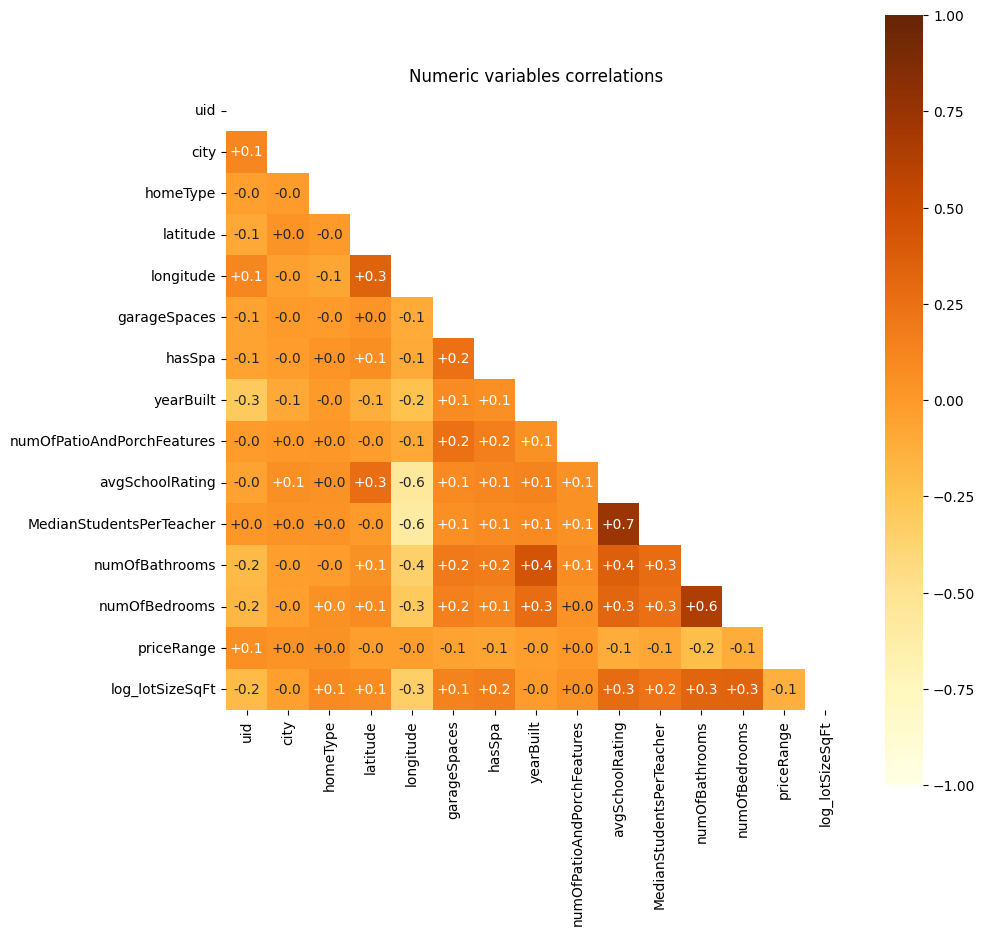

In [29]:
float_features = [int_var if 'lotSizeSqFt' not in int_var else 'log_lotSizeSqFt' for int_var in float_features]
correlation_features = int_features + float_features + bool_features + object_features
df_correlations = df[df.columns[df.columns.isin(correlation_features)]].corr()

#mask the upper half for visualization purposes
mask = np.zeros_like(df_correlations, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Draw the heatmap with the mask and correct aspect ratio
#sns.set(font_scale=1.5)
#plt.style.use("dark_background")
plt.figure(figsize= (10,10))
sns.heatmap(df_correlations, mask=mask, cmap="YlOrBr",#"RdYlBu",
    annot=True, square=True,
    vmin=-1, vmax=1,
    fmt="+.1f")
plt.title("Numeric variables correlations")

 ## feature selection

In [30]:
df[correlation_features[1:]].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
garageSpaces,10000.0,1.229600,1.328179,0.000000,0.000000,1.000000,2.000000,22.000000
yearBuilt,10000.0,1988.570400,21.515272,1905.000000,1975.000000,1993.000000,2006.000000,2020.000000
numOfPatioAndPorchFeatures,10000.0,0.667200,0.986378,0.000000,0.000000,0.000000,1.000000,8.000000
MedianStudentsPerTeacher,10000.0,14.857700,1.748473,10.000000,14.000000,15.000000,16.000000,19.000000
numOfBedrooms,10000.0,3.449200,0.813441,1.000000,3.000000,3.000000,4.000000,10.000000
latitude,10000.0,30.291191,0.097075,30.085030,30.202516,30.283664,30.366375,30.517323
longitude,10000.0,-97.778476,0.084543,-98.020477,-97.838594,-97.769680,-97.718313,-97.570633
log_lotSizeSqFt,10000.0,9.095520,0.647074,4.605170,8.784775,9.010547,9.295600,17.346406
avgSchoolRating,10000.0,5.766236,1.861940,2.333333,4.000000,5.666667,7.000000,9.500000
numOfBathrooms,10000.0,2.692100,0.979206,1.000000,2.000000,3.000000,3.000000,10.000000


In [31]:
print(f'{len(correlation_features[1:])} features selectionated for the modeling')

14 features selectionated for the modeling


In [32]:
correlation_features[1:]

['garageSpaces',
 'yearBuilt',
 'numOfPatioAndPorchFeatures',
 'MedianStudentsPerTeacher',
 'numOfBedrooms',
 'latitude',
 'longitude',
 'log_lotSizeSqFt',
 'avgSchoolRating',
 'numOfBathrooms',
 'hasSpa',
 'city',
 'homeType',
 'priceRange']

In [33]:
df_train = df[correlation_features[1:]].copy()
df_train

,garageSpaces,yearBuilt,numOfPatioAndPorchFeatures,MedianStudentsPerTeacher,numOfBedrooms,latitude,longitude,log_lotSizeSqFt,avgSchoolRating,numOfBathrooms,hasSpa,city,homeType,priceRange
0,0,1988,0,17,4,30.380089,-97.800621,11.536310,7.000000,4.0,0,6,9,1
1,0,1997,0,16,4,30.199486,-97.859947,8.784775,6.666667,3.0,0,6,9,3
2,0,1952,0,11,2,30.227398,-97.696083,8.633909,3.333333,1.0,0,6,9,0
3,4,1976,0,14,4,30.205469,-97.792351,8.766550,4.000000,2.0,0,6,9,0
4,2,1984,0,16,5,30.345106,-97.767426,9.283498,7.000000,3.0,0,6,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1982,3,17,3,30.409927,-97.763390,9.632072,7.000000,3.0,0,6,9,1
9996,0,1970,0,14,3,30.206074,-97.779472,8.791334,4.000000,2.0,0,6,9,4
9997,0,1981,1,13,3,30.198936,-97.810913,8.938925,4.000000,2.0,0,6,9,3
9998,0,1979,2,17,3,30.391880,-97.761292,9.542460,7.000000,3.0,0,6,9,4


In [34]:
df_train

,garageSpaces,yearBuilt,numOfPatioAndPorchFeatures,MedianStudentsPerTeacher,numOfBedrooms,latitude,longitude,log_lotSizeSqFt,avgSchoolRating,numOfBathrooms,hasSpa,city,homeType,priceRange
0,0,1988,0,17,4,30.380089,-97.800621,11.536310,7.000000,4.0,0,6,9,1
1,0,1997,0,16,4,30.199486,-97.859947,8.784775,6.666667,3.0,0,6,9,3
2,0,1952,0,11,2,30.227398,-97.696083,8.633909,3.333333,1.0,0,6,9,0
3,4,1976,0,14,4,30.205469,-97.792351,8.766550,4.000000,2.0,0,6,9,0
4,2,1984,0,16,5,30.345106,-97.767426,9.283498,7.000000,3.0,0,6,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1982,3,17,3,30.409927,-97.763390,9.632072,7.000000,3.0,0,6,9,1
9996,0,1970,0,14,3,30.206074,-97.779472,8.791334,4.000000,2.0,0,6,9,4
9997,0,1981,1,13,3,30.198936,-97.810913,8.938925,4.000000,2.0,0,6,9,3
9998,0,1979,2,17,3,30.391880,-97.761292,9.542460,7.000000,3.0,0,6,9,4


In [35]:
correlation_features[1:-1]

['garageSpaces',
 'yearBuilt',
 'numOfPatioAndPorchFeatures',
 'MedianStudentsPerTeacher',
 'numOfBedrooms',
 'latitude',
 'longitude',
 'log_lotSizeSqFt',
 'avgSchoolRating',
 'numOfBathrooms',
 'hasSpa',
 'city',
 'homeType']

In [36]:
df_train[correlation_features[1:-1]]

,garageSpaces,yearBuilt,numOfPatioAndPorchFeatures,MedianStudentsPerTeacher,numOfBedrooms,latitude,longitude,log_lotSizeSqFt,avgSchoolRating,numOfBathrooms,hasSpa,city,homeType
0,0,1988,0,17,4,30.380089,-97.800621,11.536310,7.000000,4.0,0,6,9
1,0,1997,0,16,4,30.199486,-97.859947,8.784775,6.666667,3.0,0,6,9
2,0,1952,0,11,2,30.227398,-97.696083,8.633909,3.333333,1.0,0,6,9
3,4,1976,0,14,4,30.205469,-97.792351,8.766550,4.000000,2.0,0,6,9
4,2,1984,0,16,5,30.345106,-97.767426,9.283498,7.000000,3.0,0,6,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,1982,3,17,3,30.409927,-97.763390,9.632072,7.000000,3.0,0,6,9
9996,0,1970,0,14,3,30.206074,-97.779472,8.791334,4.000000,2.0,0,6,9
9997,0,1981,1,13,3,30.198936,-97.810913,8.938925,4.000000,2.0,0,6,9
9998,0,1979,2,17,3,30.391880,-97.761292,9.542460,7.000000,3.0,0,6,9


 # sampling

In [37]:
X = np.array(df_train[correlation_features[1:-1]])
y = np.array(df_train[correlation_features[-1]])
print(f'X shape: {X.shape} y shape: {y.shape}')

X shape: (10000, 13) y shape: (10000,)


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2025)

 # modeling

In [39]:
dt=DecisionTreeClassifier(
    random_state=2025,
    class_weight='balanced'
)
multilabel_dt = OneVsRestClassifier(dt)

In [40]:
param_grid={
    'estimator__max_features':  ['sqrt'],
    'estimator__max_depth' : range(5,10,5),
    'estimator__min_samples_leaf': range(5,10,5),
    'estimator__min_samples_split': range(5,10,5),
    'estimator__criterion' :['gini'],
    'estimator__ccp_alpha' : [0]
}

In [41]:
CV_dtc = GridSearchCV(
    estimator=multilabel_dt,
    param_grid=param_grid,
    scoring='f1_micro',
    cv= 5
)
CV_dtc.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=OneVsRestClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                                            random_state=2025)),
             param_grid={'estimator__ccp_alpha': [0],
                         'estimator__criterion': ['gini'],
                         'estimator__max_depth': range(5, 10, 5),
                         'estimator__max_features': ['sqrt'],
                         'estimator__min_samples_leaf': range(5, 10, 5),
                         'estimator__min_samples_split': range(5, 10, 5)},
             scoring='f1_micro')

In [42]:
print("Best: %f using %s" % (CV_dtc.best_score_, CV_dtc.best_params_))

Best: 0.466714 using {'estimator__ccp_alpha': 0, 'estimator__criterion': 'gini', 'estimator__max_depth': 5, 'estimator__max_features': 'sqrt', 'estimator__min_samples_leaf': 5, 'estimator__min_samples_split': 5}


In [43]:
y_hat = CV_dtc.predict(X_test)
print("Accuracy for Decision tree on CV data: ",accuracy_score(y_test,y_hat))

Accuracy for Decision tree on CV data:  0.458


In [44]:
print("F1 score for Decision tree on CV data: ",f1_score(y_test,y_hat, average='micro'))

F1 score for Decision tree on CV data:  0.458


In [45]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.37      0.46      0.41       362
           1       0.56      0.73      0.63       550
           2       0.38      0.41      0.39       642
           3       0.40      0.27      0.32       698
           4       0.53      0.48      0.51       748

    accuracy                           0.46      3000
   macro avg       0.45      0.47      0.45      3000
weighted avg       0.45      0.46      0.45      3000



 # Save model

In [46]:
timestamp = int(datetime.utcnow().timestamp())
pathfile = f'../data/{timestamp}_dt_eda13.pkl'
print(f' Stored model: {pathfile}')
pickle.dump(CV_dtc, open(pathfile, "wb"))

 Stored model: ../data/1738126171_dt_eda13.pkl


 # Validation
# local model

In [47]:
pkl_filename_local = '../data/1738124306_dt_eda13.pkl'
with open(pkl_filename_local, 'rb') as file:
    uploaded_CV_dtc_local = pickle.load(file)

In [48]:
y_hat_dtc = uploaded_CV_dtc_local.predict(X_test)
print("Test f1_score: {0:.4f} %".format(100 * f1_score(y_test,y_hat_dtc, average='micro')))

Test f1_score: 47.5333 %


In [49]:
print("Test f1_score: {0:.4f} %".format(100 * f1_score(y_test,y_hat_dtc, average='macro')))

Test f1_score: 47.4576 %


In [50]:
print(classification_report(y_test, y_hat_dtc))

              precision    recall  f1-score   support

           0       0.39      0.57      0.46       362
           1       0.60      0.76      0.67       550
           2       0.46      0.40      0.43       642
           3       0.43      0.31      0.36       698
           4       0.46      0.44      0.45       748

    accuracy                           0.48      3000
   macro avg       0.47      0.50      0.47      3000
weighted avg       0.47      0.48      0.47      3000

